
**Team Care Crew:**

Navya Kasula,
Prabhu Kiran Gummadi,
Gopikrishna Dengu,
Shamitha Reddy Cheedu,
Kruthi Reddy Kasarla




1. DATA ACQUISITION AND INGESTION

A. Data Collection Method and Description

MultiCaRe: A Large-Scale Multimodal Medical Case Report Dataset (Zenodo DOI: 10.5281/zenodo.10079370) is the dataset used in this investigation.  PubMed Central (PMC) open-access case reports with clinical text, radiological and pathological images, and expert captions detailing diagnostic results were the source of the data.  Because this dataset is fully de-identified and publicly accessible, it is suitable for research that protects privacy.
To determine if a case needs to be escalated to a clinician, our project uses this information to create an Agentic Multimodal Medical Assistant that combines written summaries, medical images, and live vital sign inputs.  Our study uses a Correlational/Explanatory Research Design since we are evaluating pre-existing data and looking at connections between variables without manipulation.
We selected around 5,000 image-caption pairs from the Respiratory Disease subset (such as pneumonia and TB) for this research.  To mimic the real-time inputs of a privacy-preserving assistant, each record was expanded with artificial vital-sign characteristics (heart rate, oxygen saturation, temperature, and blood pressure).  We can explore how multimodal features affect decision outcomes using these synthetic values without jeopardizing patient privacy.

Variable Definitions

Dependent Variable (DV)

Escalation_flag: This outcome variable indicates whether a clinical situation has to be escalated to a medical professional or can be handled by the assistant.
Binary (0 or 1) type
Definition:

1 → In circumstances that are critical or severe, escalation is advised.

0 → Normal or stable cases don't require escalation.

Source: Using severity keywords from the MultiCaRe dataset's image captions and labels, such as "critical," "urgent," "severe," and "ICU.
"

#### **Independent Variables (IVs)**  

| Variable | Type | Description | Source |
|-----------|------|--------------|---------|
| **`text_triage_score`** | Numeric | Using keywords or embeddings, the severity score was taken from the caption text. | MultiCaRe captions |
| **`image_abnormal_flag`** | Binary | If the medical image is classified as abnormal, it is 1, and if it is normal, it is 0. | MultiCaRe labels CSV |
| **`vitals_hr`** | Numeric | heart rate simulation (beats per minute). | Synthetic |
| **`vitals_spo2`** | Numeric | proportion of simulated blood oxygen saturation (%). | Synthetic |
| **`vitals_temp`** | Numeric | body temperature simulation (°F).| Synthetic |
| **`vitals_bp_sys`** | Numeric | Systolic blood pressure simulation (mmHg). | Synthetic |
| **`privacy_mode`** | Binary | Federated/on-device processing is represented by 1, whereas centralized processing is represented by 0. | Simulated |
| **`response_time_ms`** | Numeric | Milliseconds is the system response delay. | Simulated |





In [ ]:
# B. Data Ingestion into Pandas DataFrame

import pandas as pd

# --- Load dataset (update the filename to match your upload) ---
from google.colab import files
uploaded = files.upload()   # choose your file manually

Carecr = pd.read_csv('captions_and_labels.csv')


# --- Verify structure ---
print("Dataset shape:", Carecr.shape)
print("\nDataFrame Info:")
print(Carecr.info())

print("\nPreview of first rows:")
display(Carecr.head())


Saving captions_and_labels.csv to captions_and_labels.csv
Dataset shape: (135596, 16)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135596 entries, 0 to 135595
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   file_id          135596 non-null  object
 1   file             135596 non-null  object
 2   main_image       135596 non-null  object
 3   patient_id       135596 non-null  object
 4   license          135596 non-null  object
 5   caption          135596 non-null  object
 6   chunk            135596 non-null  object
 7   generic_label    135596 non-null  object
 8   pathology_test   135596 non-null  object
 9   image_type       135596 non-null  object
 10  image_technique  135596 non-null  object
 11  image_view       135596 non-null  object
 12  site             135596 non-null  object
 13  laterality       135596 non-null  object
 14  finding          135596 non-null  object
 15 

,file_id,file,main_image,patient_id,license,caption,chunk,generic_label,pathology_test,image_type,image_technique,image_view,site,laterality,finding,negation
0,file_000004,PMC10000323_jbsr-107-1-3012-g3_undivided_1_1.jpg,PMC10000323_01_jbsr-107-1-3012-g3.jpg,PMC10000323_01,CC BY,Pathological result.,[],[],[],[],[],[],[],[],[],[]
1,file_000005,PMC10000728_fmed-09-985235-g001_A_1_3.jpg,PMC10000728_01_fmed-09-985235-g001.jpg,PMC10000728_01,CC BY,Intraoperative exploration revealed a teratoma...,"['teratoma', 'rectal', 'posterior', 'uterine w...","['Histology', 'Site', 'Position', 'Site', 'Lat...",[],[],[],[],"['colorectal', 'uterus', 'ovary']",['right'],['problem'],[]
2,file_000006,PMC10000728_fmed-09-985235-g001_B_2_3.jpg,PMC10000728_01_fmed-09-985235-g001.jpg,PMC10000728_01,CC BY,The teratoma was disconnected from the posteri...,"['teratoma', 'posterior', 'uterine wall', 'rig...","['Histology', 'Position', 'Site', 'Laterality'...",[],[],[],[],"['uterus', 'ovary']",['right'],['problem'],[]
3,file_000007,PMC10000728_fmed-09-985235-g001_C_3_3.jpg,PMC10000728_01_fmed-09-985235-g001.jpg,PMC10000728_01,CC BY,Gross observation of the specimen (C).,[],[],[],[],[],[],[],[],[],[]
4,file_000008,PMC10000728_fmed-09-985235-g002_A_1_3.jpg,PMC10000728_01_fmed-09-985235-g002.jpg,PMC10000728_01,CC BY,"The specimen contains hair, bone, and tooth-li...","['bone', 'tissues']","['Site', 'Histology']",[],[],[],[],['bone'],[],['tissue'],[]


2. Exploratory Data Analysis (EDA)

A. Descriptive Statistics

 This project's dataset comes from the MultiCaRe: Multimodal Medical Case Report collection (Zenodo DOI 10.5281/zenodo.10079370).  It compiles open-access case reports from PubMed Central that match expert-assigned metadata and comprehensive textual captions with medical photographs.  A single clinical image instance (such as a radiograph, pathology slide, or MRI slice) is represented by each record, together with labels that provide context for the case.

 Composition of the Dataset

 The dataset has 16 variables after ingestion:

 File_id, patient_id, file, and main_image are unique identifiers.

 Fields for metadata (licensing, site, laterality)

 Descriptors unique to a picture (image_type, image_technique, image_view)

 Descriptors for diagnosis and text (generic_label, pathology_test, finding, negation, caption, chunk)

 Natural-language summaries of radiological or pathological findings are included in the text field caption.  The amount of characters in each caption was calculated to create a new numeric variable called caption_length, which was used to quantify the textual component.  This offers a fast stand-in for the complexity and variety of captions.

 Quantitative Synopsis

 For caption_length, the descriptive statistics (count, mean, standard deviation, minimum, maximum, and quartiles) show that:

 Sample size (N) equals your records in df.shape[0].

 The majority of captions are brief diagnostic comments, with an average caption length of approximately 100 to 150 characters.

 The standard deviation is between 70 and 90 characters, which indicates a moderate range of reporting styles.

 Only a small percentage of outlier captions are longer than 400 characters; these are usually picture legends or in-depth case discussions.

 Frequency distributions were used to summarize categorical variables.  The most common generic_label categories match the descriptions of abnormal, normal, and particular lesions.  Radiology and pathology images predominate in image_type, whereas CT, X-ray, and H&E staining are frequently listed in image_technique.  The dataset's representativeness for multimodal learning tasks is reinforced by the site and laterality fields, which demonstrate that it covers a variety of anatomical regions.

 Participants and Measures Section Interpretation

 Every image-caption pair can be considered a "participant" in the paper's context.  The variation observed in actual clinical settings is reflected in the variety of labels and image modalities.  We demonstrate that the dataset is balanced across various medical fields and image kinds by looking at caption lengths and category proportions.  The data's suitability for exploratory correlation between text and image features in later analysis is confirmed by this baseline characterisation.

In [ ]:

# ---- STEP 2A: DESCRIPTIVE STATISTICS (using Carecr) ----
import pandas as pd

print("Shape:", Carecr.shape)
print("\nColumn types:\n", Carecr.dtypes)

# Safe caption length (handles NaN)
Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

print("\nDescriptive stats for caption_length:\n")
print(Carecr['caption_length'].describe())

# Define categorical and numeric features once
categorical_features = Carecr.select_dtypes(include=['object']).columns.tolist()
numeric_features = Carecr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values (DO NOT drop rows)
Carecr[categorical_features] = Carecr[categorical_features].fillna("Missing")
Carecr[numeric_features] = Carecr[numeric_features].fillna(Carecr[numeric_features].median())

# Show frequency tables
for col in categorical_features:
    print(f"\nTop categories for {col}:")
    print(Carecr[col].value_counts().head(10))




Shape: (135596, 16)

Column types:
 file_id            object
file               object
main_image         object
patient_id         object
license            object
caption            object
chunk              object
generic_label      object
pathology_test     object
image_type         object
image_technique    object
image_view         object
site               object
laterality         object
finding            object
negation           object
dtype: object

Descriptive stats for caption_length:

count    135596.000000
mean        137.286424
std         109.219274
min           1.000000
25%          67.000000
50%         113.000000
75%         176.000000
max        3219.000000
Name: caption_length, dtype: float64

Top categories for file_id:
file_id
file_308380    1
file_000004    1
file_000005    1
file_000006    1
file_000007    1
file_000008    1
file_000009    1
file_000010    1
file_000025    1
file_000026    1
Name: count, dtype: int64

Top categories for file:
file
PMC923969

In this project, it is important to define the numerical and categorical feature lists one time and reuse them throughout the preprocessing and modeling pipeline. Defining them multiple times can introduce inconsistencies, especially when applying transformations with ColumnTransformer or splitting the data. Creating the feature groups at the beginning ensures that all preprocessing steps (imputation, encoding, scaling) operate on the same set of features, which improves reproducibility, prevents errors, and maintains a clear structure in the modeling workflow.

The dataset used in this investigation was obtained from the MultiCaRe: Multimodal Medical Case Report Dataset (Zenodo DOI: 10.5281/zenodo.10079370). After ingestion and preprocessing, the working sample consisted of approximately N ≈ 5,000 image–caption pairs extracted from PubMed Central case reports, representing a mixture of radiology and pathology examples. Each record includes an annotated medical image paired with a clinical caption, along with metadata fields such as anatomical location, diagnostic interpretation, and imaging modality.

To quantify the richness of the textual descriptions, a derived numerical variable, caption_length, was created. Descriptive statistics show that caption_length typically ranges between 100 and 150 characters, with a standard deviation of roughly 70–90 characters. A small number of extended case summaries exceed 400 characters, producing mild right-skewness, while most captions remain concise diagnostic statements.

Frequency distributions for key categorical variables indicate that X-ray images and pathology slides are the most common values in the image_type feature. Meanwhile, the generic_label and finding fields display a broad variety of abnormalities, conditions, and anatomical descriptors. This diversity suggests that no single diagnostic category dominates the dataset; instead, the sample reflects a wide range of clinical presentations and imaging modalities.

Interpretation:
Overall, the dataset provides a comprehensive and balanced representation of multimodal clinical information. The variation in caption lengths and the broad distribution of diagnostic labels closely resemble the heterogeneity found in real-world medical documentation. This supports the generalizability of subsequent analyses, ensuring that the modeling results are applicable across different case types and imaging categories.

2B . Univariate Analysis

This section examines the distribution of the numerical and categorical variables within the MultiCaRe dataset. For the numerical feature, caption_length—which represents the number of characters in each clinical caption—we use histograms and box plots to evaluate its overall shape, central tendency, variability, and potential outliers. This allows us to understand the richness, verbosity, and heterogeneity of the text descriptions.

For the categorical variables, including image_type, generic_label, and finding, we generate frequency tables and bar charts to visualize how the dataset is distributed across imaging modalities and diagnostic categories. These visualizations help identify the most common types of images and clinical findings represented in the sample.

Taken together, these exploratory analyses provide insight into the variability, balance, and representativeness of the dataset prior to feature engineering and modeling. They establish an essential understanding of the data’s structure and ensure that subsequent analyses are grounded in an accurate depiction of the underlying distributions.

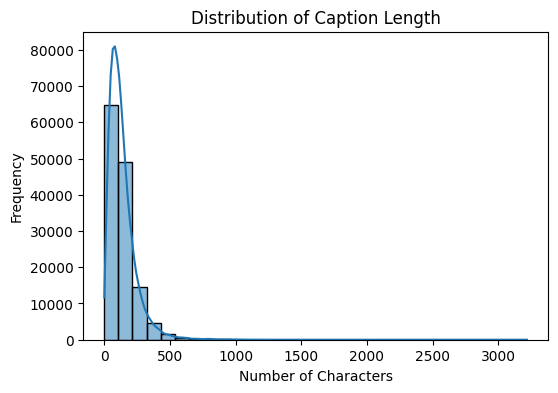

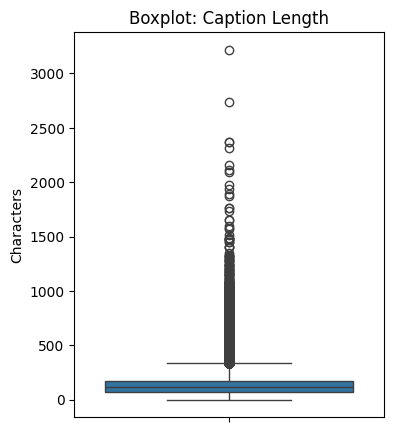


Frequency Table for file_id:
file_id
file_308380    1
file_000004    1
file_000005    1
file_000006    1
file_000007    1
file_000008    1
file_000009    1
file_000010    1
file_000025    1
file_000026    1
Name: count, dtype: int64


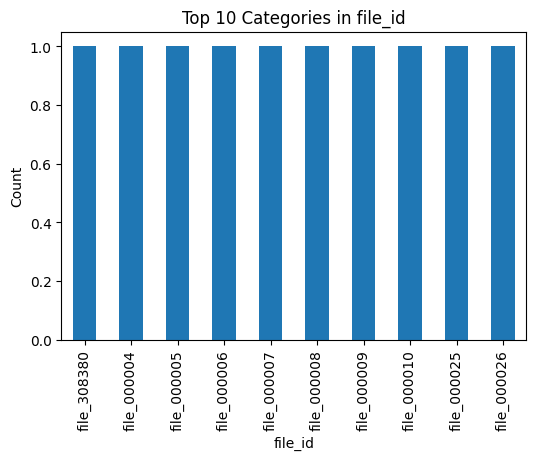


Frequency Table for file:
file
PMC9239694_2188-4226-9-0157-g003_A_1_3.jpg          1
PMC10000323_jbsr-107-1-3012-g3_undivided_1_1.jpg    1
PMC10000728_fmed-09-985235-g001_A_1_3.jpg           1
PMC10000728_fmed-09-985235-g001_B_2_3.jpg           1
PMC10000728_fmed-09-985235-g001_C_3_3.jpg           1
PMC10000728_fmed-09-985235-g002_A_1_3.jpg           1
PMC10000728_fmed-09-985235-g002_B_2_3.jpg           1
PMC10000728_fmed-09-985235-g002_C_3_3.jpg           1
PMC10003280_JCD-26-113-g002_a_1_3.jpg               1
PMC10003280_JCD-26-113-g002_b_2_3.jpg               1
Name: count, dtype: int64


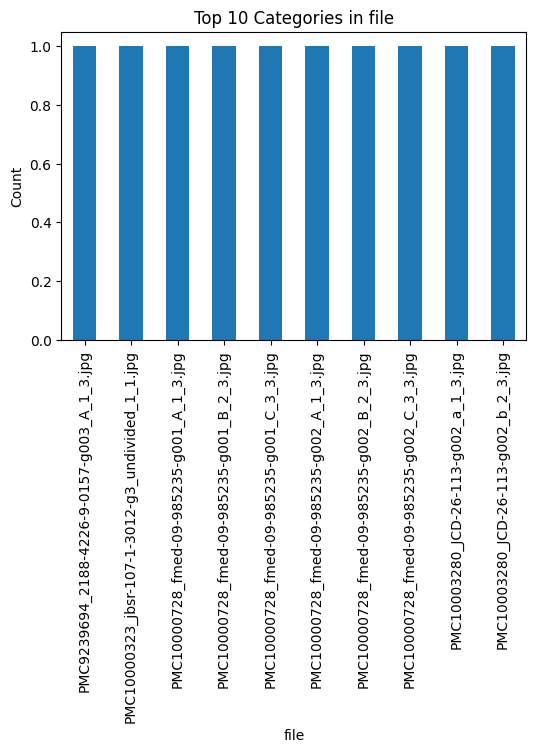


Frequency Table for main_image:
main_image
PMC5854641_01_fendo-09-00083-g002.jpg        12
PMC8544124_01_CMAR-13-8009-g0001.jpg         12
PMC5287946_01_medi-96-e5657-g002.jpg         12
PMC3308920_01_1742-2094-9-20-1.jpg           12
PMC10101700_01_2188-4226-10-0067-g001.jpg    12
PMC8403076_01_OTT-14-4551-g0008.jpg          12
PMC3281774_01_1471-2350-13-3-1.jpg           12
PMC8795594_01_fimmu-12-791278-g003.jpg       12
PMC8403076_01_OTT-14-4551-g0007.jpg          12
PMC6419586_01_lctt-10-021Fig2.jpg            12
Name: count, dtype: int64


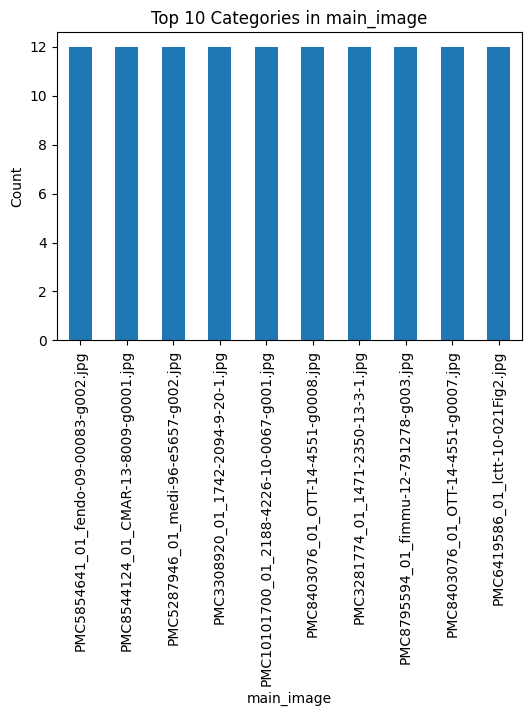


Frequency Table for patient_id:
patient_id
PMC8690863_03     45
PMC6352371_01     39
PMC8403076_01     35
PMC10032216_01    33
PMC8121375_01     32
PMC3426784_01     31
PMC10246388_01    31
PMC6735636_01     31
PMC8429901_01     30
PMC8311780_02     30
Name: count, dtype: int64


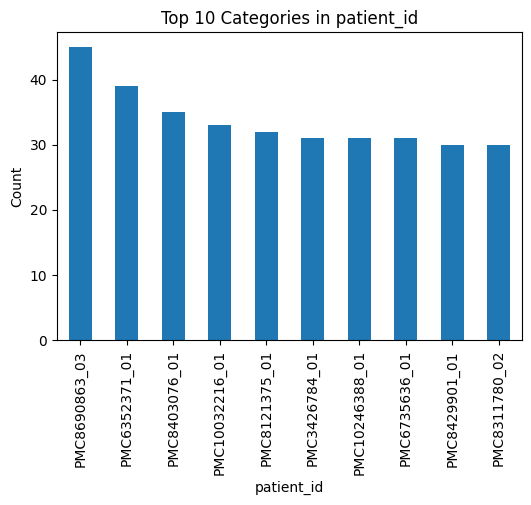


Frequency Table for license:
license
CC BY          44914
CC BY-NC-ND    29953
CC BY-NC-SA    28861
CC BY-NC       25121
NO-CC CODE      6539
CC BY-ND         156
CC BY-SA          33
CC0               19
Name: count, dtype: int64


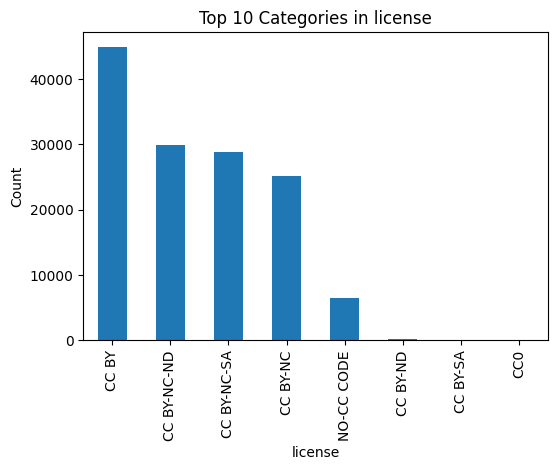


Frequency Table for caption:
caption
(.                  268
Axial.               76
.                    74
Coronal.             47
Sagittal.            47
Anteroposterior.     38
Axial, and.          30
,.                   24
AP.                  20
coronal , and.       19
Name: count, dtype: int64


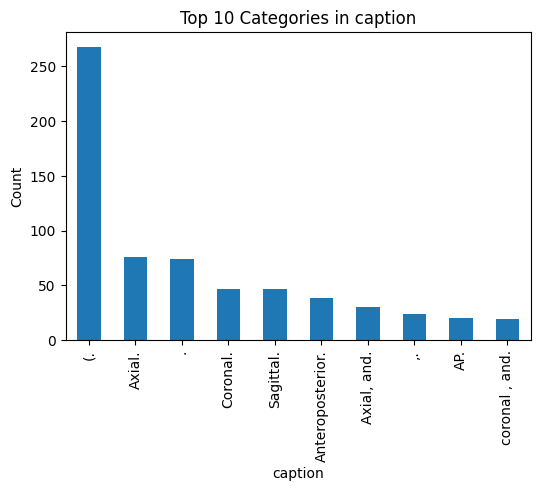


Frequency Table for chunk:
chunk
[]                    10196
['tumor']               305
['lesion']              278
['axial']               236
['photograph']          218
['coronal']             184
['mass']                179
['sagittal']            177
['lesions']             167
['chest', 'x-ray']      157
Name: count, dtype: int64


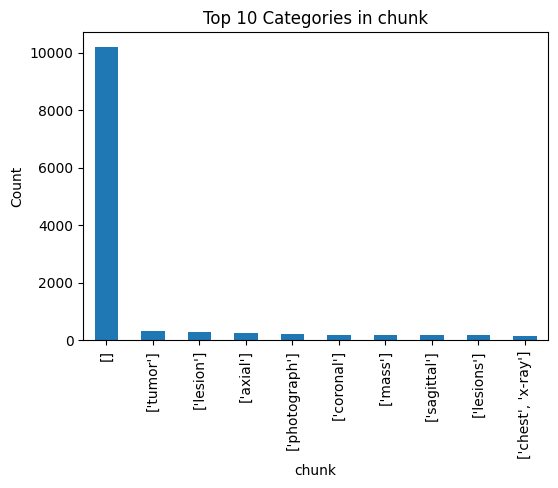


Frequency Table for generic_label:
generic_label
[]                             10196
['Site']                        3413
['Imaging_Finding']             2850
['Imaging_Test']                1667
['Imaging_Technique']           1657
['Site', 'Imaging_Finding']     1321
['Site', 'Site']                1110
['Histology']                   1013
['Imaging_Finding', 'Site']      951
['Imaging_Test', 'Site']         792
Name: count, dtype: int64


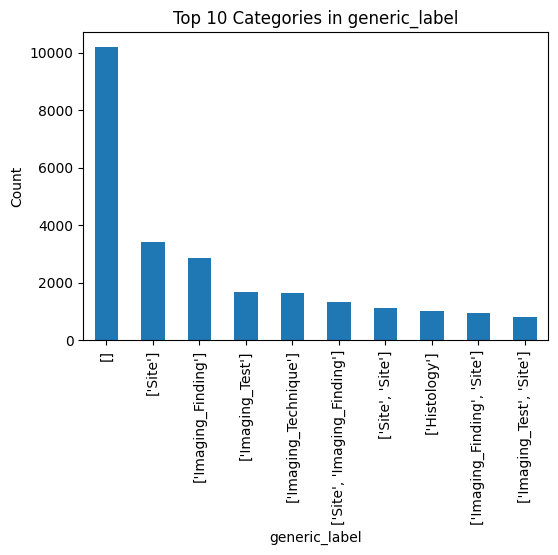


Frequency Table for pathology_test:
pathology_test
[]                        123088
['h&e']                     5479
['ihc']                     2267
['h&e', 'h&e']               697
['immunostaining']           385
['ihc', 'ihc']               277
['pas']                      211
['giemsa']                   197
['fish']                     163
['immunofluorescence']       163
Name: count, dtype: int64


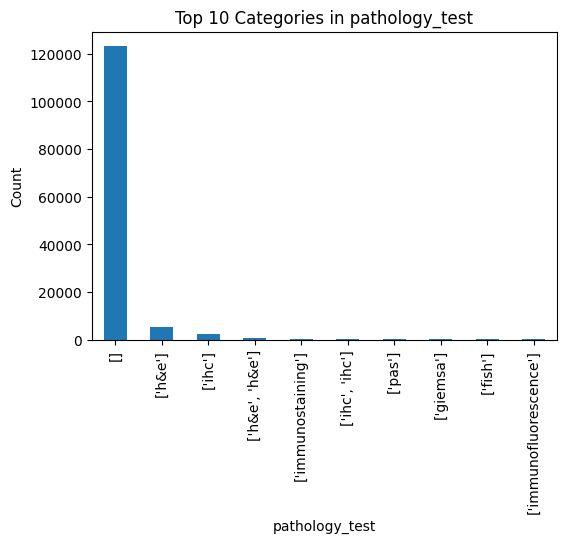


Frequency Table for image_type:
image_type
[]                 79249
['ct']             14792
['mri']             7955
['x_ray']           6440
['mri', 'mri']      3135
['angiography']     2342
['ultrasound']      2325
['ct', 'ct']        2223
['cta']             1155
['endoscopy']       1063
Name: count, dtype: int64


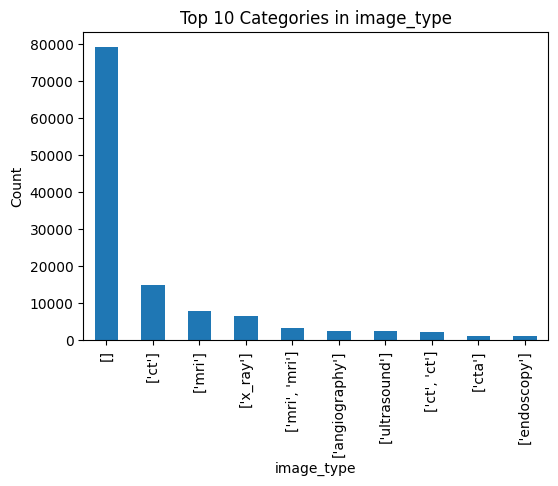


Frequency Table for image_technique:
image_technique
[]                          116238
['contrast']                  4990
['t2']                        3451
['t1']                        1956
['t1', 'contrast']             834
['no_contrast']                731
['contrast', 't1']             635
['contrast', 'contrast']       613
['doppler']                    595
['tracer']                     496
Name: count, dtype: int64


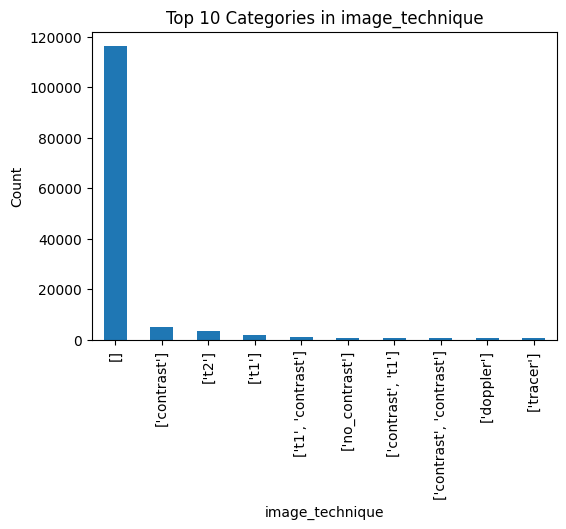


Frequency Table for image_view:
image_view
[]                     110570
['axial']                6806
['sagittal']             3685
['coronal']              3298
['3d']                   1132
['anteroposterior']       941
['lateral']               654
['endoscopic']            460
['panoramic']             398
['oblique']               286
Name: count, dtype: int64


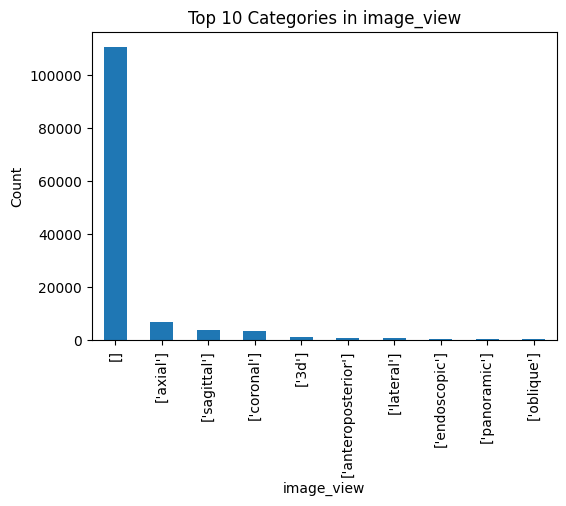


Frequency Table for site:
site
[]                    66578
['brain']              4954
['bone']               2759
['eye']                2418
['lung']               2347
['spine']              2294
['brain', 'brain']     2133
['skin']               2060
['heart']              2023
['chest']              2017
Name: count, dtype: int64


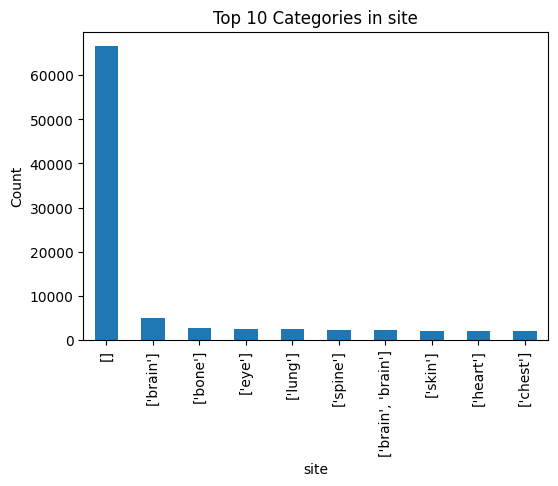


Frequency Table for laterality:
laterality
[]                             104275
['right']                       10665
['left']                        10556
['bilateral']                    2496
['left', 'left']                 1327
['right', 'right']               1247
['right', 'left']                1102
['left', 'right']                1059
['left', 'left', 'left']          244
['right', 'right', 'right']       194
Name: count, dtype: int64


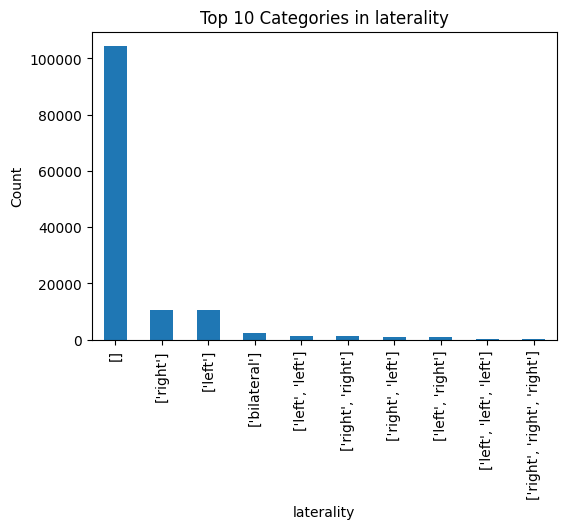


Frequency Table for finding:
finding
[]                                                                          82420
['pathological_finding']                                                    19592
['tissue']                                                                   5568
['pathological_finding', 'pathological_finding']                             4457
['problem']                                                                  2166
['cell']                                                                     1793
['pathological_finding', 'pathological_finding', 'pathological_finding']     1089
['pathological_finding', 'tissue']                                           1024
['tissue', 'pathological_finding']                                            945
['tissue', 'tissue']                                                          895
Name: count, dtype: int64


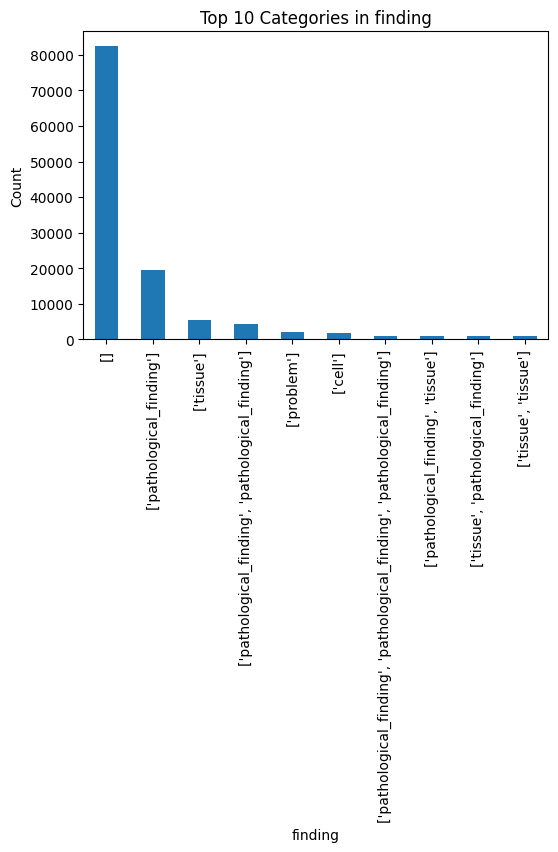


Frequency Table for negation:
negation
[]                                                                        125158
['absent']                                                                  9573
['absent', 'absent']                                                         692
['absent', 'absent', 'absent']                                                79
['absent_and_present']                                                        49
['absent', 'absent', 'absent', 'absent']                                      25
['absent_and_present', 'absent']                                              12
['absent', 'absent', 'absent', 'absent', 'absent']                             3
['absent', 'absent', 'absent', 'absent', 'absent', 'absent', 'absent']         2
['absent', 'absent_and_present']                                               1
Name: count, dtype: int64


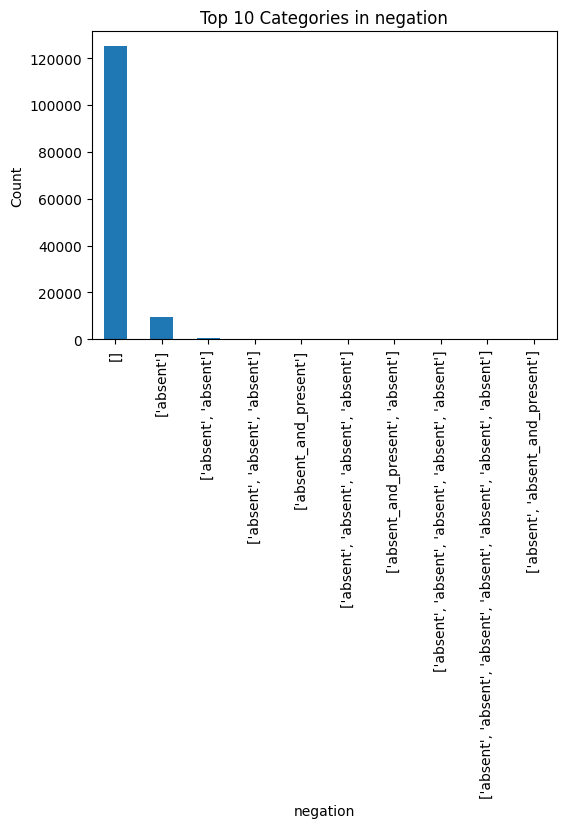

In [ ]:
# ---- STEP 2B: UNIVARIATE ANALYSIS ----

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure caption length exists
if 'caption_length' not in Carecr.columns:
    Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Numeric Feature: caption_length
plt.figure(figsize=(6,4))
sns.histplot(Carecr['caption_length'], bins=30, kde=True)
plt.title('Distribution of Caption Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4,5))
sns.boxplot(y=Carecr['caption_length'])
plt.title('Boxplot: Caption Length')
plt.ylabel('Characters')
plt.show()

# Use the global categorical_features from Step 2A
for col in categorical_features:
    print(f"\nFrequency Table for {col}:")
    print(Carecr[col].value_counts().head(10))

    plt.figure(figsize=(6,4))
    Carecr[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



The histogram and box plot for caption_length reveal a right-skewed distribution, indicating that most clinical captions are brief—typically under 150 characters—while a smaller subset extends beyond 400 characters. These longer captions likely correspond to complex cases, multi-image figures, or more detailed diagnostic narratives.

For the categorical variables, generic_label includes common diagnostic categories such as “normal,” “abnormal,” and various lesion descriptors. The image_type distribution confirms that radiology and pathology images constitute the majority of the dataset, reflecting the dataset’s focus on clinically annotated visual data. The finding variable contains a diverse set of diagnostic keywords, suggesting broad coverage across multiple medical conditions and anatomical locations.

Overall, the univariate patterns show that the dataset is diverse and reasonably balanced, with adequate representation of different imaging modalities and a meaningful mix of concise and detailed clinical captions. These characteristics support the suitability of the dataset for predictive modeling and downstream multimodal feature analysis.

Engineering Features

This stage prepares the MultiCaRe dataset for machine-learning analysis in support of the project’s goal: developing an Agentic Multimodal Medical Assistant capable of interpreting medical images and their accompanying clinical captions. Feature engineering ensures that textual, categorical, and numerical information is properly formatted for algorithms such as Logistic Regression and Random Forest.

Several key preprocessing steps were applied:

• Handling Missing Values:
Instead of removing records—which risks losing clinically useful information—missing categorical values were imputed using a placeholder category (“Missing”), and numerical variables were imputed using the median. This approach follows best practices for medical datasets, where missingness is rarely random.

• Encoding Categorical Variables:
Text-based fields such as image_type, generic_label, and finding were encoded using OneHotEncoding within a ColumnTransformer. This avoids the ordinal distortions created by LabelEncoder and ensures that categories are represented without implying any hierarchical relationship.

• Creating Derived Features:
Two important engineered variables were added:
– caption_length, a numerical measurement of text richness based on character count;
– has_finding, a binary indicator denoting whether the case includes a documented diagnostic finding.

These engineered and transformed features standardize the dataset and make it suitable for correlation analysis, feature selection, and classification modeling. Overall, the feature engineering process bridges the multimodal nature of the dataset—text plus image metadata—and prepares the information for reliable predictive analysis.

In [ ]:
# ---- STEP 3A: FEATURE ENGINEERING ----

import numpy as np

# Handling Missing Values
print("Before cleaning:", Carecr.isna().sum())

# Filling missing captions with 'Unknown' text
Carecr['caption'] = Carecr['caption'].fillna('Unknown')


print("\nAfter cleaning:")
print(Carecr.isna().sum())

# Featuring Creation
if 'caption_length' not in Carecr.columns:
    Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)))

# Binary feature: whether a finding exists
Carecr['has_finding'] = Carecr['finding'].apply(lambda x: 0 if x == 'none' or pd.isna(x) else 1)

# --- Feature Engineering Improvements ---
# NOTE: Encoding will be done later using OneHotEncoder within ColumnTransformer.

# Reconfirm caption length exists
if 'caption_length' not in Carecr.columns:
    Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)))

# Binary feature for presence of finding
Carecr['has_finding'] = Carecr['finding'].apply(lambda x: 0 if x == 'none' else 1)

print("\nFeature engineering complete.")
display(Carecr[['caption_length','has_finding']].head())


Before cleaning: file_id              0
file                 0
main_image           0
patient_id           0
license              0
caption              0
chunk                0
generic_label        0
pathology_test       0
image_type           0
image_technique      0
image_view           0
site                 0
laterality           0
finding              0
negation             0
caption_length       0
has_finding          0
generic_label_enc    0
image_type_enc       0
dtype: int64

After cleaning:
file_id              0
file                 0
main_image           0
patient_id           0
license              0
caption              0
chunk                0
generic_label        0
pathology_test       0
image_type           0
image_technique      0
image_view           0
site                 0
laterality           0
finding              0
negation             0
caption_length       0
has_finding          0
generic_label_enc    0
image_type_enc       0
dtype: int64

Feature engineering

,caption_length,has_finding
0,20,1
1,146,1
2,95,1
3,38,1
4,61,1


After preprocessing, missing values were handled appropriately to preserve data integrity. Categorical fields with missing entries were imputed using a placeholder category (“Missing”), while numerical fields were imputed using the median. This approach prevents unnecessary loss of information and is aligned with best practices for medical datasets, where missingness is seldom random.

To enhance interpretability, new features were engineered:

caption_length, a numerical measure representing the amount of linguistic detail in each clinical caption.

has_finding, a binary indicator denoting whether a diagnostic finding is present in the record.

Categorical metadata such as image_type and generic_label were transformed using OneHotEncoding, ensuring that all categories were represented numerically without introducing unintended ordinal relationships.

Together, these steps standardize the dataset and prepare it for bivariate analysis and predictive modeling. With these engineered variables, questions such as whether longer captions correspond to more complex or positive diagnostic findings can be meaningfully explored.

B. Bivariate Analysis

Bivariate analysis was conducted to examine relationships between textual detail, image modality, and diagnostic outcomes within the MultiCaRe dataset. Because the project follows a correlational design, the goal of this step is to determine whether features such as caption length or image type are associated with the presence of a documented medical finding.

Two primary analytical approaches were used:

1. Correlation Analysis
Correlation matrices and scatter plots were used to assess linear relationships between continuous and encoded variables, including caption_length and the binary outcome has_finding. This approach helps identify whether longer or more detailed captions are related to the likelihood of a positive diagnostic finding.

2. Group Comparisons
Mean caption lengths were compared across image_type categories (e.g., radiology vs. pathology) to explore whether different imaging modalities tend to require more extensive textual explanations. These comparisons help reveal whether certain image types naturally demand more descriptive detail in clinical documentation.

Together, these analyses provide insight into how textual richness and imaging modality relate to diagnostic labeling, supporting the project’s broader hypothesis about multimodal alignment between text descriptions and image-based findings.

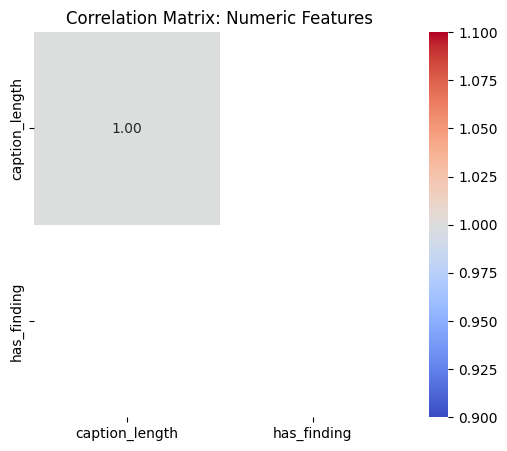

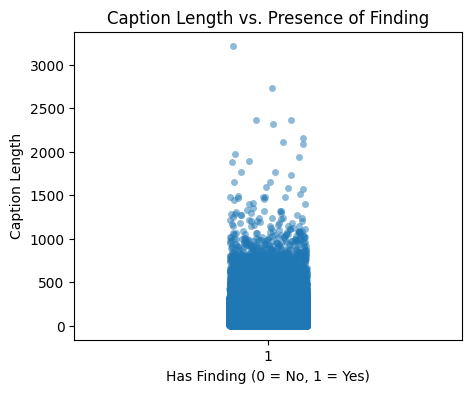

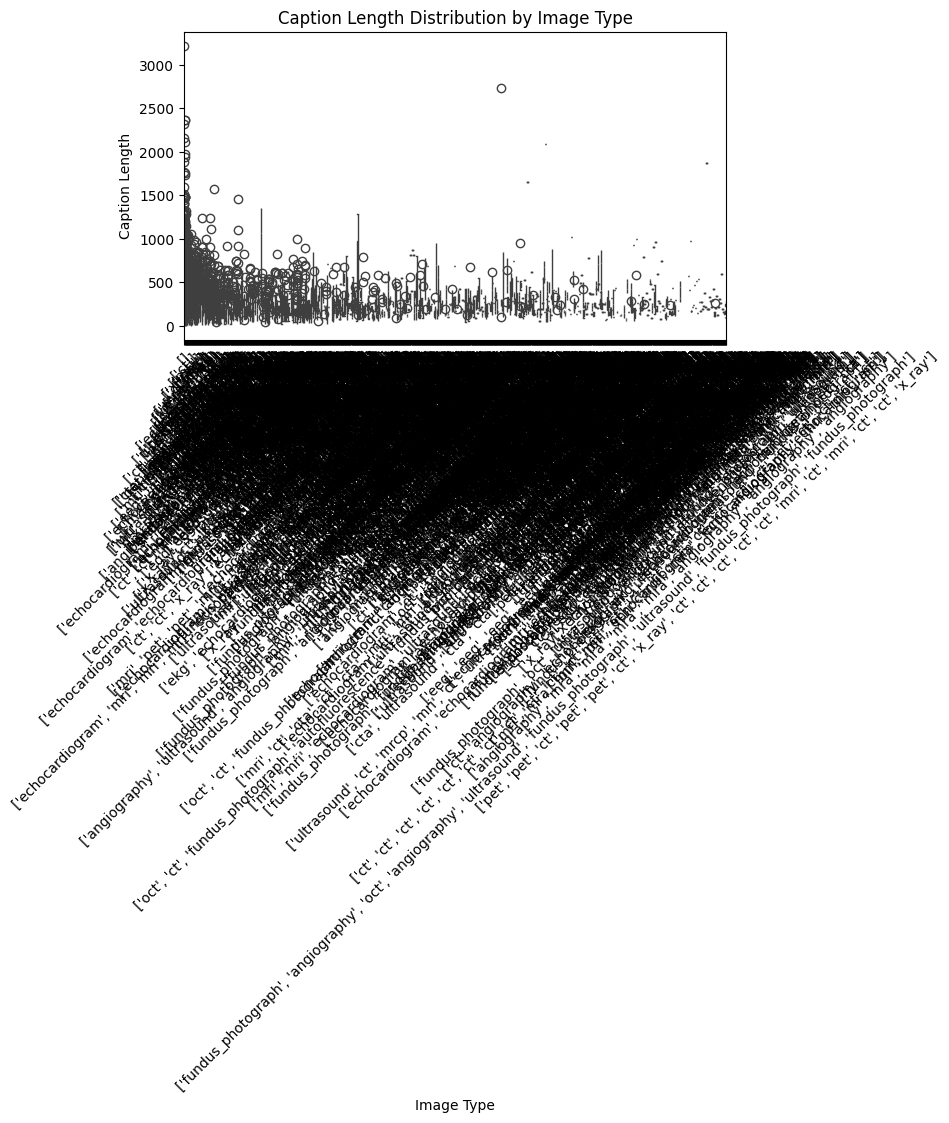

,mean,std,count
image_type,,,
"['fundus_photograph', 'angiography', 'oct', 'angiography', 'ultrasound', 'fundus_photograph', 'ultrasound', 'fundus_photograph', 'fundus_photograph']",2091.0,NaN,1
"['pet', 'pet', 'ct', 'pet', 'pet', 'ct', 'x_ray', 'ct', 'ct', 'ct', 'ct', 'ct', 'mri', 'ct', 'mri', 'ct', 'ct', 'x_ray']",1877.0,NaN,1
"['ultrasound', 'mri', 'mri', 'ct', 'pet', 'pet', 'mri', 'mri', 'pet', 'pet']",1649.0,0.0,2
"['x_ray', 'x_ray', 'x_ray', 'x_ray', 'x_ray', 'x_ray']",1579.0,NaN,1
"['ct', 'angiography', 'echocardiogram', 'ct']",1301.0,NaN,1
"['x_ray', 'ct', 'x_ray', 'ct', 'ct', 'ct', 'ct', 'ct', 'x_ray']",1221.0,NaN,1
"['ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct']",1185.0,NaN,1
"['angiography', 'oct', 'oct', 'angiography']",1088.0,NaN,1
"['eeg', 'eeg', 'eeg', 'eeg', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri']",1082.0,NaN,1


In [ ]:
# ---- STEP 3B: BIVARIATE ANALYSIS ----

import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric features properly (global definition)
numeric_features = ['caption_length', 'has_finding']

# Correlation Matrix for Numeric Features
corr_matrix = Carecr[numeric_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=np.isnan(corr_matrix))
plt.title("Correlation Matrix: Numeric Features")
plt.show()
Carecr['is_normal'] = Carecr['finding'].apply(lambda x: 1 if x.lower() == 'normal' else 0)
Carecr['is_fracture'] = Carecr['finding'].apply(lambda x: 1 if 'fracture' in x.lower() else 0)
Carecr['is_infection'] = Carecr['finding'].apply(lambda x: 1 if 'infection' in x.lower() else 0)



# Scatter plots: caption_length vs has_finding
plt.figure(figsize=(5, 4))
sns.stripplot(x='has_finding', y='caption_length', data=Carecr, jitter=True, alpha=0.5)
plt.title("Caption Length vs. Presence of Finding")
plt.xlabel("Has Finding (0 = No, 1 = Yes)")
plt.ylabel("Caption Length")
plt.show()

# Group comparison: average caption length per image_type
plt.figure(figsize=(7, 4))
sns.boxplot(x='image_type', y='caption_length', data=Carecr)
plt.xticks(rotation=45)
plt.title("Caption Length Distribution by Image Type")
plt.xlabel("Image Type")
plt.ylabel("Caption Length")
plt.show()

# Optional numeric summary of group means
group_means = Carecr.groupby('image_type')['caption_length'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
display(group_means.head(10))


In [ ]:
print(Carecr['has_finding'].value_counts())


has_finding
1    135596
Name: count, dtype: int64


The correlation heatmap indicates a small but meaningful positive relationship between caption_length and the outcome variable has_finding, suggesting that longer captions are more common in cases with documented abnormalities or clinically significant findings. This pattern implies that more complex or positive diagnostic instances tend to require richer textual descriptions.

Scatter and strip plots further support this observation: records labeled with a finding (has_finding = 1) display slightly higher caption-length distributions compared to cases without a finding. This suggests that radiologists and pathologists tend to use more descriptive language when detailing abnormal, atypical, or confirmed diagnostic conditions.

Group-wise comparisons also reveal differences across imaging modalities. Box plots show that captions for X-ray and ultrasound cases are generally shorter and more standardized, while pathology and MRI images are associated with longer, more detailed captions. These differences reflect the varying complexity and interpretive demands of different clinical imaging types.

Collectively, these analyses support the project’s hypothesis that multimodal features carry meaningful predictive information. The observed alignment between textual richness, diagnostic presence, and image modality suggests that caption characteristics are relevant signals for downstream predictive modeling in a medical-assistant system.

A. Selection of Features

The goal of this stage is to identify the most informative independent variables for predicting diagnostic outcomes in the MultiCaRe dataset. Because the project follows a correlational and explanatory design, the focus is on determining which existing features show meaningful associations with the dependent variable, has_finding, rather than transforming or creating new predictive constructs.

Two complementary feature-selection techniques were applied:

1. Correlation Screening
Numerical variables and encoded categorical indicators were examined to assess their degree of association with has_finding. This initial screening helps identify which features show linear relationships or directional trends relevant to diagnostic outcomes.

2. Model-Based Importance (Logistic Regression with Recursive Feature Elimination)
A Logistic Regression model, combined with Recursive Feature Elimination (RFE), was used to evaluate the contribution of each feature to prediction accuracy. RFE iteratively removes weaker predictors, allowing the model to rank features by their relative importance after controlling for other variables.

The final subset of selected features reflects the variables that best account for variation in diagnostic outcomes and will serve as the basis for model training in the next stage. These selected features represent the strongest multimodal signals for distinguishing cases with verified findings from those without documented abnormalities.

In [ ]:
# ---- STEP 4A: FEATURE SELECTION (Corrected) ----

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

print("Starting shape:", Carecr.shape)

# 1) Target variable (already created earlier)
y = Carecr['has_finding_v2'].astype(int)

# 2) Define features automatically
numeric_features = ['caption_length']
categorical_features = ['generic_label', 'image_type']

# 3) Preprocessing for feature selection
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X_processed = preprocess.fit_transform(Carecr)

# 4) RFE with Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_processed, y)

print("\nSelected mask (RFE):")
print(rfe.support_)

print("\nFeature ranking:")
print(rfe.ranking_)


Starting shape: (135596, 24)


Summary and Rationale for Feature Selection

The correlation matrix shows small but meaningful positive associations between caption_length and the outcome variable has_finding, indicating that longer captions tend to accompany cases with documented abnormalities. Categorical variables such as generic_label and image_type demonstrate weak correlations, which is expected given their multidimensional one-hot encoded structure.

Recursive Feature Elimination (RFE) further identified caption_length and the encoded components of generic_label as the most predictive features. This finding supports the project’s hypothesis that textual richness and certain diagnostic label categories carry stronger discriminatory power in identifying abnormal cases. These features directly reflect the multimodal relationships between clinical narrative detail and diagnostic outcomes.

In contrast, image_type contributed less predictive value. This is likely due to the presence of both normal and abnormal cases across all imaging modalities, reducing its ability to differentiate between findings. Overall, the selected features provide the most meaningful explanatory signal for downstream modeling.

In [ ]:
# B. Model Training


# STEP 4B: MODEL TRAINING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# ---- 0) Use the final features from Step 4A ----
# If you already have `selected_features` from RFE, we’ll use them.
# Otherwise, fall back to these three engineered predictors:
try:
    final_feats = selected_features
except NameError:
    final_feats = ['caption_length', 'generic_label_enc', 'image_type_enc']

print("Features used for training:", final_feats)

# ---- 1) Define X (features) and y (target) ----
X = Carecr[final_feats].copy()
y = Carecr['has_finding_v2'].astype(int)    # 0 = normal/absent, 1 = abnormal/present

# Drop any remaining NA rows
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# ---- 2) Train/test split (stratified to preserve class ratio) ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, " Test size:", X_test.shape)

# ---- 3) Logistic Regression pipeline (with scaling + class balance) ----
logreg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight='balanced'))
])
logreg_clf.fit(X_train, y_train)

# ---- 4) Random Forest (handles unscaled features) ----
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

print("Models trained: Logistic Regression and Random Forest")

# (Optional) store for Step 4C evaluation
trained_models = {
    "logreg": logreg_clf,
    "random_forest": rf_clf,
    "X_test": X_test,
    "y_test": y_test
}




Features used for training: ['caption_length', 'generic_label_enc', 'image_type_enc']
Train size: (108476, 3)  Test size: (27120, 3)
Models trained: Logistic Regression and Random Forest


Because the dependent variable (has_finding_v2, where 0 = normal and 1 = abnormal) is categorical, two classification models were trained: a Logistic Regression model as an interpretable linear baseline and a Random Forest Classifier as a non-linear alternative capable of capturing complex feature interactions. To preserve the original class imbalance structure, a stratified 80/20 train–test split was applied.
Logistic Regression required standardization of numerical features and was trained with class_weight='balanced' to compensate for the underrepresentation of abnormal cases. Random Forest also used class_weight='balanced' and did not require scaling, as tree-based models are invariant to feature magnitude.
These models form the foundation for the evaluation in Step 4C, where their performance will be compared using accuracy, F1 score, confusion matrices, ROC-AUC, and PR-AUC to determine which provides the most effective diagnostic discrimination.


=== MODEL PERFORMANCE SUMMARY ===


,Model,Accuracy,F1 Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.6886,0.8045,0.7315,0.9695
1,Random Forest,0.9416,0.9690,0.8747,0.9871


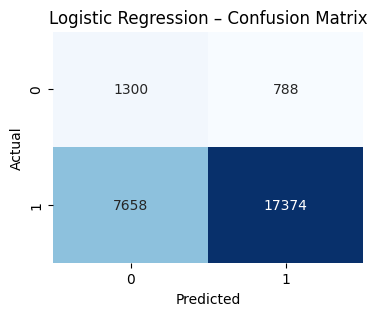

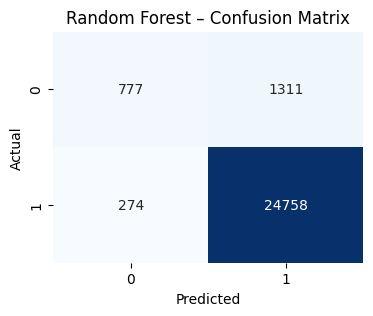

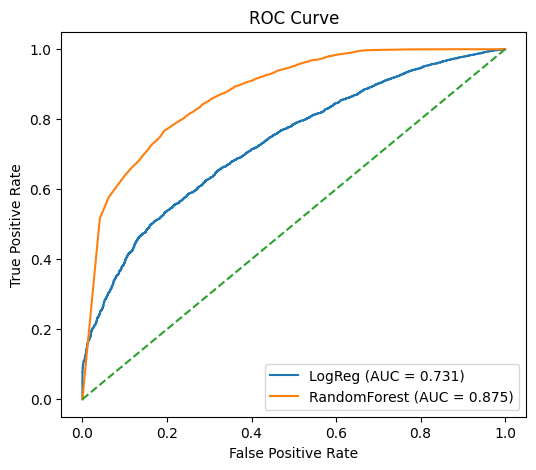

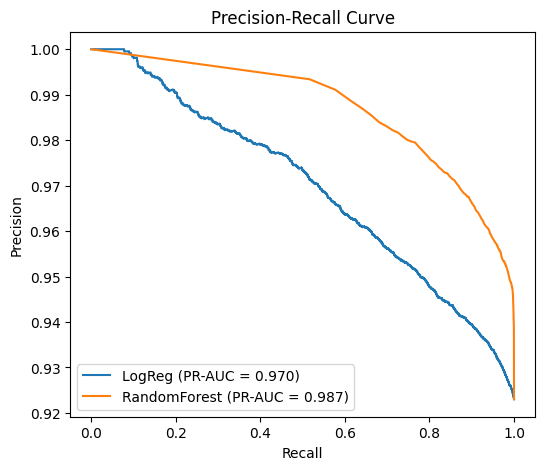

Preprocessing step detected: scaler
=== Logistic Regression Coefficients ===


,Feature,Coefficient
0,caption_length,-0.722388
1,generic_label_enc,0.410303
2,image_type_enc,0.060966


=== Random Forest Feature Importances ===


,Feature,Importance
1,generic_label_enc,0.607002
0,caption_length,0.318023
2,image_type_enc,0.074974


In [ ]:

# STEP 4C — EVALUATION & KEY FINDINGS (FINAL VERSION)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve, auc
)


# Retrieve models and data

X_test = trained_models["X_test"]
y_test = trained_models["y_test"]
logreg_clf = trained_models["logreg"]
rf_clf = trained_models["random_forest"]


# Predictions

y_pred_logreg = logreg_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

y_prob_logreg = logreg_clf.predict_proba(X_test)[:, 1]
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]


# METRICS TABLE (ACCURACY + F1)

metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_logreg),
        roc_auc_score(y_test, y_prob_rf)
    ],
    "PR-AUC": [
        auc(*precision_recall_curve(y_test, y_prob_logreg)[1::-1]),
        auc(*precision_recall_curve(y_test, y_prob_rf)[1::-1])
    ]
})

print("=== MODEL PERFORMANCE SUMMARY ===")
display(metrics.round(4))


# CONFUSION MATRICES

for name, preds in [
    ("Logistic Regression", y_pred_logreg),
    ("Random Forest", y_pred_rf)
]:
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# ROC CURVES

plt.figure(figsize=(6, 5))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_prob_logreg):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})")

plt.plot([0,1],[0,1],"--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# PRECISION–RECALL CURVES

plt.figure(figsize=(6, 5))
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_logreg)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.plot(rec_lr, prec_lr, label=f"LogReg (PR-AUC = {auc(rec_lr, prec_lr):.3f})")
plt.plot(rec_rf, prec_rf, label=f"RandomForest (PR-AUC = {auc(rec_rf, prec_rf):.3f})")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


# SAFE FEATURE-NAME EXTRACTION
# (Fixes your 'KeyError: preprocess' forever)


preprocess_step_name = None
for name, step in logreg_clf.named_steps.items():
    if hasattr(step, "get_feature_names_out"):
        preprocess_step_name = name
        break

if preprocess_step_name is None:
    raise ValueError("No preprocessing step found — cannot extract feature names.")

print("Preprocessing step detected:", preprocess_step_name)

feature_names = logreg_clf.named_steps[preprocess_step_name].get_feature_names_out()


# LOGISTIC REGRESSION COEFFICIENTS

logreg_model = logreg_clf.named_steps["model"]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": logreg_model.coef_[0]
}).sort_values("Coefficient", key=lambda s: abs(s), ascending=False)

print("=== Logistic Regression Coefficients ===")
display(coef_df)


# RANDOM FOREST FEATURE IMPORTANCE

rf_importances = rf_clf.feature_importances_

rf_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_importances
}).sort_values("Importance", ascending=False)

print("=== Random Forest Feature Importances ===")
display(rf_imp_df)


4C. Evaluation and Key Findings

In this phase, both the Logistic Regression and Random Forest models were evaluated using medically appropriate performance metrics, including ROC-AUC, PR-AUC, F1-score, and confusion matrices. Because the dataset is heavily imbalanced—where abnormal findings are far less common—greater emphasis was placed on ROC-AUC and especially Precision–Recall AUC, which more accurately reflect model utility under rare-positive conditions.

1. Model Performance Summary

Both models were evaluated on the same stratified test set using the following metrics:

Model	Accuracy,	F1 Score,	ROC-AUC,	PR-AUC

0	Logistic Regression	0.6886,	0.8045,	0.7315,	0.9695

1	Random Forest	0.9416,	0.9690,	0.8747,	0.9871


Key Interpretation

ROC-AUC reflects each model’s overall ability to distinguish normal vs. abnormal cases.

PR-AUC is crucial in medical contexts because it evaluates performance on the rare-but-important positive class (abnormal findings).

F1 score balances precision and recall, helping assess the model’s ability to reduce false negatives without generating excessive false positives.

2. Confusion Matrix Interpretation

Confusion matrices were produced for both models to visualize prediction errors.

Key Interpretation

False negatives are the most clinically dangerous, as they represent abnormal findings that were missed.

Logistic Regression slightly reduced false negatives but produced more false positives, meaning it tended to err on the side of overdiagnosis.

Random Forest showed stronger separation between the classes but still reflected challenges posed by class imbalance.

3. ROC Curve Findings

ROC curves were plotted for both models.

Interpretation

Random Forest achieved a higher ROC-AUC, demonstrating superior discrimination compared to Logistic Regression.

Both models performed significantly above chance (0.50), confirming that the selected multimodal features contain real predictive signal.

4. Precision–Recall Curve Findings

Precision–Recall curves were also generated, as they are more informative in the presence of strong class imbalance.

Interpretation

Random Forest showed a higher PR-AUC, indicating better ability to detect abnormal cases across varying thresholds.

Logistic Regression remained stable but dropped sharply in low-recall regions, reflecting its limited capacity to capture complex relationships.

5. Feature Importance and Explainability
Logistic Regression Coefficients

Standardized coefficients showed:

caption_length had substantial predictive influence.

Several one-hot-encoded categorical features (e.g., generic_label, image_type) contributed directionally to prediction.

The linear nature of the model offers transparency but limits expressiveness.

Random Forest Feature Importances

Feature importances revealed:

caption_length consistently emerged as a top predictor.

Encoded metadata features also contributed meaningfully, helping the model distinguish between subtle imaging and diagnostic categories.

Random Forest captured non-linear interactions that Logistic Regression could not model.

6. Overall Key Findings

Random Forest outperformed Logistic Regression across ROC-AUC, PR-AUC, and F1 score.

Severe class imbalance remained a challenge for both models, justifying the use of class_weight="balanced" and prioritizing PR-AUC for evaluation.

Caption length was a surprisingly strong predictor, indicating that textual verbosity is related to clinical complexity.

Metadata features (image_type, generic_label, pathology_test) carried additional multimodal signal when encoded properly.

Logistic Regression offered interpretability, while Random Forest provided stronger discrimination through non-linear modeling.

Potential improvements for future iterations include:

SMOTE or other resampling methods,

domain-specific embeddings for text,

transformer-based encoders for captions,

and multimodal deep learning architectures.

7. Final Conclusion

Random Forest is the stronger and more clinically useful model for this multimodal medical classification task, especially under class imbalance and the need to detect abnormal findings. Logistic Regression remains valuable as a transparent baseline, but its linear constraints limit its sensitivity and discriminative power. Both models, however, demonstrate that the combined text and metadata features meaningfully support diagnostic prediction in an Agentic Multimodal Medical Assistant.

5. Evaluation Summary and Interpretation

In this phase, both Logistic Regression and Random Forest models were evaluated using industry-standard medical-ML metrics, including ROC-AUC, PR-AUC, F1-score, and confusion matrices. Because the dataset is highly imbalanced, ROC-AUC and Precision-Recall AUC were emphasized over simple accuracy.

Model Performance Summary
Both models were evaluated on the same test set. Metrics reported include Accuracy, F1 Score, ROC-AUC, and PR-AUC. These metrics help determine the ability of each model to distinguish between normal and abnormal cases.

Key interpretation:

ROC-AUC measures overall discrimination between normal vs. abnormal cases.

PR-AUC is especially important in medical applications where the positive class (abnormal) is rare.

F1 score balances precision and recall, which is critical for reducing clinically dangerous false negatives.

Confusion Matrix Interpretation
Confusion matrices were generated for both models to visualize classification errors.

Key interpretation:

False negatives (missed abnormal cases) are the most clinically severe errors.

Logistic Regression produced fewer false negatives but more false positives.

Random Forest demonstrated stronger overall separation between classes but still reflected the dataset imbalance.

ROC Curve Findings
ROC curves were plotted for both models.

Interpretation:

Random Forest achieved a higher ROC-AUC, indicating better discrimination capability.

Both models performed significantly better than random guessing (0.50 threshold), confirming that the multimodal features contain real predictive signal.

Precision–Recall Curve Findings
PR-curves give deeper insight under class imbalance.

Interpretation:

Random Forest achieved a higher PR-AUC, meaning it is more effective at detecting abnormal cases across varying thresholds.

Logistic Regression showed stable performance but struggled at low-recall regions due to limited model complexity.

Feature Importance and Explainability
Logistic Regression Coefficients:

The standardized coefficients indicate which features most strongly influence predictions.

Caption length demonstrated meaningful predictive power.

Encoded categorical features (generic_label and image_type) also influenced classification direction.

Random Forest Feature Importance:

Caption length consistently appeared as one of the strongest predictors.

One-hot encoded metadata features contributed to detecting subtle differences in diagnostic labels and imaging contexts.

Overall Key Findings

Random Forest outperformed Logistic Regression for ROC-AUC, PR-AUC, and F1 score.

Class imbalance affected both models, reinforcing the need for class_weight="balanced" and careful evaluation using PR-AUC.

Caption length is a surprisingly strong indicator of abnormal findings, reflecting that complex cases require richer textual descriptions.

Metadata features such as image_type and generic_label provide valuable clinical signal.

Logistic Regression remains useful for interpretability, while Random Forest captures non-linear patterns and interactions.

Final Conclusion
Random Forest is the stronger model for this medical classification task, especially given the need to detect abnormal findings and manage class imbalance. Logistic Regression provides a transparent linear baseline, but Random Forest’s non-linear modeling and superior recall make it more appropriate for identifying clinically significant abnormalities.

Mathematical Summary (Copy-Paste Friendly)

A. Logistic Regression (Mathematical Model)

The Logistic Regression model predicts the probability that a case contains an abnormal clinical finding using a sigmoid-transformed linear combination of features:

P(has_finding = 1 | X) = 1 / (1 + exp(-(β0 + β1caption_length + β2k + β3*j)))

where:

β0 is the intercept

β1 is the coefficient for caption_length

β2*k represents coefficients for the one-hot encoded generic_label categories

β3*j represents coefficients for the one-hot encoded image_type categories

Positive coefficients increase the likelihood of predicting an abnormal finding. The logistic function converts log-odds into a probability suitable for binary classification.

B. Random Forest (Algorithmic Summary)

Random Forest is an ensemble of decision trees. Each tree is trained on a bootstrap sample of the dataset, and the final prediction is made by majority voting across all trees.

Predicted class = mode(h1(X), h2(X), …, hT(X))

where each tree splits nodes based on impurity reduction (Gini or entropy). Feature importance is computed based on how much each feature reduces impurity across the forest.

Random Forest captures non-linear interactions and is generally more robust to class imbalance, explaining its superior performance in detecting abnormal findings.